<h1><center>Precios de maíz del año 2022</center></h1>

Parte 1: Descargando los datos utilizando Web Scrapping

In [1]:
# Usando las librerías para web scrapping y la descarga de los ficheros
import requests
import threading
from bs4 import BeautifulSoup
import wget

In [2]:
# Creando una lista con los URLs para lego poder leer los ficheros
URL = 'https://www.mapa.gob.es/es/estadistica/temas/publicaciones/informe-semanal-coyuntura/2022.aspx'
page = requests.get(URL).text
soup = BeautifulSoup(page, 'lxml')
divs = soup.find('div', class_='anclas-enlaces')
ul = divs.find('ul', class_='custom-bullet')
links = ul.find_all('a')
i = False
download_urls = []
for a in links:
    if a.has_attr('href'):
        if i:
            download_urls.insert(0, a['href'])
            i = False
            continue
        else:
            i = True
            continue

In [ ]:
# Descargando los ficheros 
mapa_url = 'https://www.mapa.gob.es'

count = 53
for url in download_urls:
    full_url = mapa_url + url 
    count -= 1
    wget.download(full_url, f"./Datos/Semana_{count}.xlsx")

Parte 2: Leyendo los ficheros

In [2]:
import pandas as pd
import numpy as np

In [4]:
precios = pd.read_excel('./Datos/Semana_1.xlsx', sheet_name='Pág. 11', skiprows=8, names=['MERCADO', 'Semana_1'], usecols='C,E', nrows=18)
for i in range(2, 53):
    file = './Datos/Semana_' + str(i)  + '.xlsx'
    precios_tmp = pd.read_excel(file, sheet_name='Pág. 11', skiprows=8, names=['PRODUCTO', 'MERCADO', f'Semana_{i}'], usecols='B,C,E', nrows=18, decimal=',')
    
    # Algunas semanas contienen datos de más mercados y otros de menos pero nunca más que 18. 
    # Con estas lineas, elimino datos que no corresponden al producto Maíz.
    for i in range(17, 12, -1):
        if precios_tmp.iloc[i, 0] == 'Arroz cáscara (Indica)' :
            precios_tmp = precios_tmp.iloc[:i, :]
            break
    precios_tmp = precios_tmp.iloc[:, 1:]
    
    # Creo un único DataFrame
    precios = pd.merge(left=precios, right=precios_tmp, how='outer', left_on='MERCADO', right_on='MERCADO')

precios

,MERCADO,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,Semana_6,Semana_7,Semana_8,Semana_9,...,Semana_43,Semana_44,Semana_45,Semana_46,Semana_47,Semana_48,Semana_49,Semana_50,Semana_51,Semana_52
0,Albacete,280.8,278.4,276.80,276.80,278.0,276.8,281.6,282.8,331.6,...,337.60,337.60,337.60,334.4,329.40,320.0,313.6,307.4,312.60,312.60
1,Badajoz,280.0,285.0,285.00,285.00,284.0,285.0,287.0,287.0,360.0,...,350.00,350.00,351.00,350.0,350.00,349.0,340.0,340.0,330.00,340.00
2,Cáceres,280.0,285.0,285.00,285.00,284.0,285.0,287.0,287.0,360.0,...,350.00,350.00,351.00,350.0,350.00,349.0,340.0,340.0,330.00,340.00
3,Ciudad Real,279.4,279.2,287.20,279.20,280.0,279.4,279.4,279.4,332.0,...,368.40,368.40,368.40,356.0,347.60,340.0,338.0,332.6,328.00,331.00
4,Córdoba,290.0,275.0,275.00,275.00,275.0,275.0,275.0,275.0,NaN,...,340.00,340.00,337.00,337.0,327.00,327.0,327.0,NaN,NaN,NaN
5,La Coruña,275.0,275.0,275.00,275.00,275.0,275.0,275.0,275.0,350.0,...,342.00,342.00,340.00,325.0,322.00,322.0,322.0,320.0,320.00,320.00
6,Gerona,283.0,283.0,278.00,283.00,286.0,287.0,288.0,288.0,327.0,...,350.00,360.00,350.00,337.0,332.00,330.0,324.0,320.0,315.00,320.00
7,Huesca,280.0,280.0,281.00,282.00,282.0,281.0,281.0,281.0,366.0,...,342.00,347.00,341.00,333.0,328.00,320.0,315.0,310.0,307.00,310.00
8,León,276.8,277.0,274.60,277.00,277.0,277.0,277.0,277.0,336.0,...,351.00,351.00,348.40,339.0,332.00,325.0,314.4,311.4,311.40,311.60
9,Lérida,272.0,269.0,269.00,273.00,275.0,275.0,275.0,275.0,NaN,...,340.00,345.00,340.00,335.0,330.00,320.0,315.0,307.0,307.00,310.00


In [5]:
precios.describe()

,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,Semana_6,Semana_7,Semana_8,Semana_9,Semana_10,...,Semana_43,Semana_44,Semana_45,Semana_46,Semana_47,Semana_48,Semana_49,Semana_50,Semana_51,Semana_52
count,18.000000,18.000000,18.0000,18.000000,18.000000,18.000000,18.000000,18.000000,14.000000,16.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,280.444444,279.577778,279.6300,280.163333,280.233333,280.344444,280.833333,280.861111,342.685714,398.725000,...,350.281111,351.524444,348.663333,341.711111,335.291111,329.811111,324.411111,320.244444,317.407778,320.047778
std,4.564083,4.413289,5.1748,4.262693,3.861271,4.216386,4.556702,4.622342,16.938025,18.403315,...,9.754532,9.638937,9.899006,10.028952,10.357947,9.613097,9.930221,10.850114,8.068364,9.463995
min,272.000000,269.000000,269.0000,273.000000,275.000000,275.000000,275.000000,275.000000,300.000000,356.600000,...,337.600000,337.600000,333.000000,325.000000,318.000000,320.000000,310.000000,307.000000,305.000000,310.000000
25%,277.450000,276.850000,275.0000,276.650000,276.850000,276.800000,276.250000,275.800000,333.000000,391.000000,...,342.000000,342.750000,340.000000,334.550000,328.350000,322.000000,315.250000,311.550000,311.700000,311.850000
50%,280.000000,280.000000,280.0700,281.070000,280.900000,280.500000,281.200000,281.050000,346.500000,400.000000,...,350.000000,350.500000,349.800000,340.300000,332.700000,327.100000,323.000000,320.000000,316.100000,319.530000
75%,282.750000,282.750000,284.6500,283.600000,283.450000,284.550000,284.600000,284.650000,350.900000,409.350000,...,358.815000,360.000000,354.585000,350.000000,345.000000,335.000000,329.300000,325.000000,323.750000,323.750000
max,290.000000,286.000000,287.2000,286.000000,286.000000,287.000000,288.000000,288.000000,366.000000,430.000000,...,368.400000,368.400000,368.400000,356.000000,350.000000,349.000000,340.000000,340.000000,330.000000,340.000000


In [6]:
# Añadiendo el resultado medio de cada semana

fila_precio_medio = pd.DataFrame(round(precios.mean(axis=0, numeric_only=True, skipna=True), 1)).transpose()
fila_precio_medio.insert(0, column='MERCADO', value='Precio Medio')

precios = pd.concat([precios, fila_precio_medio], ignore_index=True, sort=False)
precios

,MERCADO,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,Semana_6,Semana_7,Semana_8,Semana_9,...,Semana_43,Semana_44,Semana_45,Semana_46,Semana_47,Semana_48,Semana_49,Semana_50,Semana_51,Semana_52
0,Albacete,280.8,278.4,276.80,276.80,278.0,276.8,281.6,282.8,331.6,...,337.60,337.60,337.60,334.4,329.40,320.0,313.6,307.4,312.60,312.60
1,Badajoz,280.0,285.0,285.00,285.00,284.0,285.0,287.0,287.0,360.0,...,350.00,350.00,351.00,350.0,350.00,349.0,340.0,340.0,330.00,340.00
2,Cáceres,280.0,285.0,285.00,285.00,284.0,285.0,287.0,287.0,360.0,...,350.00,350.00,351.00,350.0,350.00,349.0,340.0,340.0,330.00,340.00
3,Ciudad Real,279.4,279.2,287.20,279.20,280.0,279.4,279.4,279.4,332.0,...,368.40,368.40,368.40,356.0,347.60,340.0,338.0,332.6,328.00,331.00
4,Córdoba,290.0,275.0,275.00,275.00,275.0,275.0,275.0,275.0,NaN,...,340.00,340.00,337.00,337.0,327.00,327.0,327.0,NaN,NaN,NaN
5,La Coruña,275.0,275.0,275.00,275.00,275.0,275.0,275.0,275.0,350.0,...,342.00,342.00,340.00,325.0,322.00,322.0,322.0,320.0,320.00,320.00
6,Gerona,283.0,283.0,278.00,283.00,286.0,287.0,288.0,288.0,327.0,...,350.00,360.00,350.00,337.0,332.00,330.0,324.0,320.0,315.00,320.00
7,Huesca,280.0,280.0,281.00,282.00,282.0,281.0,281.0,281.0,366.0,...,342.00,347.00,341.00,333.0,328.00,320.0,315.0,310.0,307.00,310.00
8,León,276.8,277.0,274.60,277.00,277.0,277.0,277.0,277.0,336.0,...,351.00,351.00,348.40,339.0,332.00,325.0,314.4,311.4,311.40,311.60
9,Lérida,272.0,269.0,269.00,273.00,275.0,275.0,275.0,275.0,NaN,...,340.00,345.00,340.00,335.0,330.00,320.0,315.0,307.0,307.00,310.00


In [18]:
# Añadiendo también el precio más alto y más bajo de cada semana

fila_precio_maximo = pd.DataFrame([precios.max(axis=0, numeric_only=True)], columns=precios.columns)
fila_precio_maximo['MERCADO'][0] = 'Precio Máximo'

fila_precio_minimo = pd.DataFrame([precios.min(axis=0, numeric_only=True)], columns=precios.columns)
fila_precio_minimo['MERCADO'][0] = 'Precio Mínimo'

precios = pd.concat([precios, fila_precio_maximo, fila_precio_minimo], ignore_index=True, sort=False)
precios

,MERCADO,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,Semana_6,Semana_7,Semana_8,Semana_9,...,Semana_43,Semana_44,Semana_45,Semana_46,Semana_47,Semana_48,Semana_49,Semana_50,Semana_51,Semana_52
0,Albacete,280.8,278.4,276.80,276.80,278.0,276.8,281.6,282.8,331.6,...,337.60,337.60,337.60,334.4,329.40,320.0,313.6,307.4,312.60,312.60
1,Badajoz,280.0,285.0,285.00,285.00,284.0,285.0,287.0,287.0,360.0,...,350.00,350.00,351.00,350.0,350.00,349.0,340.0,340.0,330.00,340.00
2,Cáceres,280.0,285.0,285.00,285.00,284.0,285.0,287.0,287.0,360.0,...,350.00,350.00,351.00,350.0,350.00,349.0,340.0,340.0,330.00,340.00
3,Ciudad Real,279.4,279.2,287.20,279.20,280.0,279.4,279.4,279.4,332.0,...,368.40,368.40,368.40,356.0,347.60,340.0,338.0,332.6,328.00,331.00
4,Córdoba,290.0,275.0,275.00,275.00,275.0,275.0,275.0,275.0,NaN,...,340.00,340.00,337.00,337.0,327.00,327.0,327.0,NaN,NaN,NaN
5,La Coruña,275.0,275.0,275.00,275.00,275.0,275.0,275.0,275.0,350.0,...,342.00,342.00,340.00,325.0,322.00,322.0,322.0,320.0,320.00,320.00
6,Gerona,283.0,283.0,278.00,283.00,286.0,287.0,288.0,288.0,327.0,...,350.00,360.00,350.00,337.0,332.00,330.0,324.0,320.0,315.00,320.00
7,Huesca,280.0,280.0,281.00,282.00,282.0,281.0,281.0,281.0,366.0,...,342.00,347.00,341.00,333.0,328.00,320.0,315.0,310.0,307.00,310.00
8,León,276.8,277.0,274.60,277.00,277.0,277.0,277.0,277.0,336.0,...,351.00,351.00,348.40,339.0,332.00,325.0,314.4,311.4,311.40,311.60
9,Lérida,272.0,269.0,269.00,273.00,275.0,275.0,275.0,275.0,NaN,...,340.00,345.00,340.00,335.0,330.00,320.0,315.0,307.0,307.00,310.00


Parte 3: Visualizando los resultados

In [24]:
# Quedando solamente con el precio medio, máximo y mínimo de cada semana

precios_medios = precios.loc[precios['MERCADO'] == 'Precio Medio'].values[0][1:]
precios_maximos = precios.loc[precios['MERCADO'] == 'Precio Máximo'].values[0][1:]
precios_minimos = precios.loc[precios['MERCADO'] == 'Precio Mínimo'].values[0][1:]

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

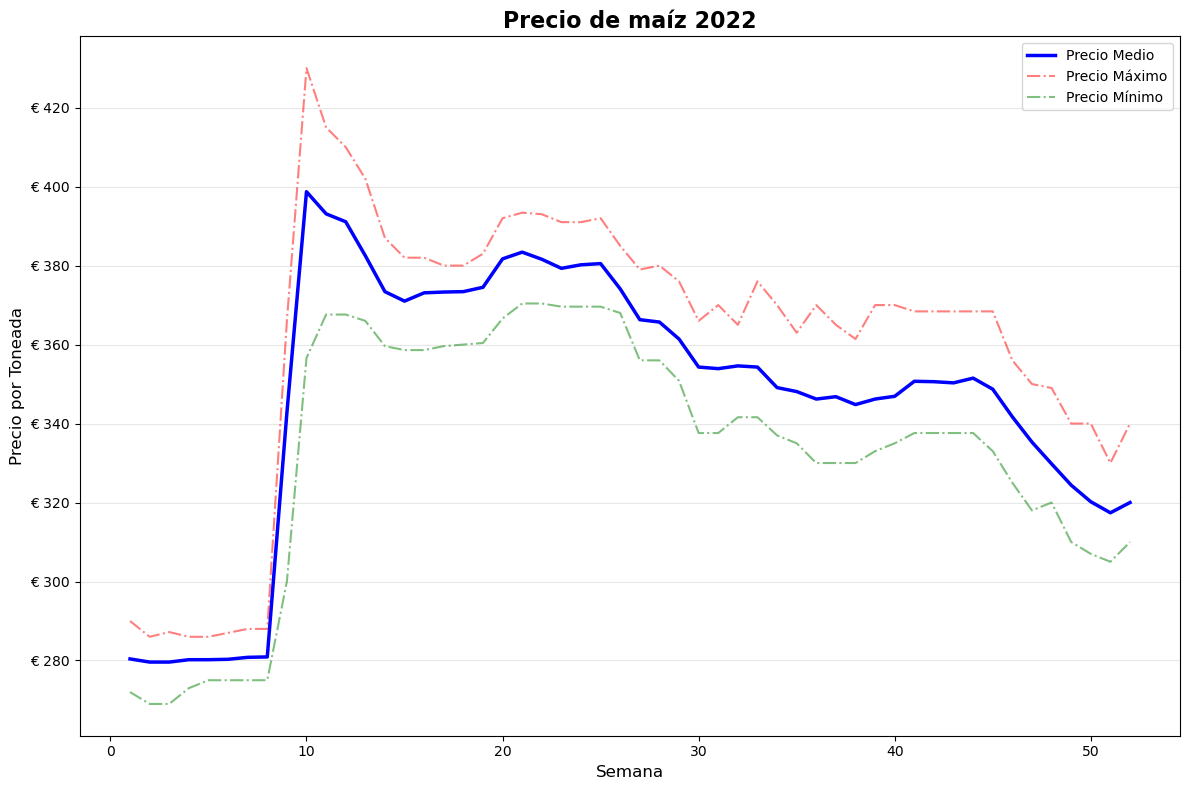

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 53), precios_medios, label='Precio Medio', color='blue', linestyle='-', linewidth=2.5)
plt.plot(range(1, 53), precios_maximos, label='Precio Máximo', color='red', alpha=0.5, linestyle='-.')
plt.plot(range(1, 53), precios_minimos, label='Precio Mínimo', color='green', alpha=0.5, linestyle='-.')

plt.xlabel('Semana', fontsize=12)
plt.ylabel('Precio por Toneada', fontsize=12)
plt.title('Precio de maíz 2022', fontsize=16, fontweight='bold')
plt.legend()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

fmt = '€{x: ,.0f}'
tick = mticker.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()


plt.show()